# 🚗 Day 8 - Vehicle Insurance Claim Fraud Detection
### Detecting fraudulent vehicle insurance claims using Machine Learning techniques (Random Forest + SMOTE)

A machine learning project that detects fraudulent vehicle insurance claims by training a Random Forest model with SMOTE to handle imbalanced data and accurately classify genuine vs. fraudulent claims.

---

## 1. Introduction
Fraudulent insurance claims are a growing challenge for the automobile insurance industry, leading to significant financial losses every year. Detecting such frauds manually is inefficient and error-prone, given the massive volume of claim data generated daily.  
This project leverages **Machine Learning techniques** to automatically identify fraudulent claims based on claim attributes, customer information, and policy details. By integrating **Random Forest** and **SMOTE (Synthetic Minority Oversampling Technique)**, the model effectively handles class imbalance and improves fraud detection accuracy.


---

## 2. Project Objectives
- To build a **predictive model** that classifies vehicle insurance claims as *fraudulent* or *genuine*.  
- To **analyze and preprocess** claim data for optimal model performance.  
- To address the **class imbalance** problem using SMOTE for balanced learning.  
- To evaluate the model using metrics like **ROC-AUC, Precision, Recall, and F1-score**.  
- To identify the **most influential features** contributing to fraud detection.  


---

## 3. Dataset Overview
- **Source:** [Vehicle Insurance Claim Fraud Dataset – Kaggle](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection)  
- **File:** `fraud_oracle.csv`  
- **Records:** Approximately several thousand claim entries  
- **Type:** Tabular dataset with 33 columns (categorical and numerical features)  
- **Key Columns:** Month, AccidentArea, PolicyType, VehiclePrice, DriverRating, AgeOfVehicle, PoliceReportFiled, WitnessPresent, NumberOfSuppliments, etc.  
- **Target Variable:** `FraudFound_P` (1 = Fraudulent, 0 = Genuine)  
- **Challenge:** Highly imbalanced dataset with fewer fraudulent claims compared to genuine ones.  


---

## 4. Methodology and Approach
- Collected and explored the Kaggle dataset to understand features and target (`FraudFound_P`).  
- Cleaned data, handled missing values, encoded categorical features, and scaled numeric ones.  
- Used **SMOTE** to handle class imbalance between fraudulent and genuine claims.  
- Trained a **Random Forest Classifier** for prediction.  
- Evaluated model performance using **Precision**, **Recall**, **F1-Score**, and **ROC-AUC**.  
- Analyzed **feature importance** and applied **SHAP** for model explainability.


---

## 5. Tools and Libraries Used
- **Programming Language:** Python  
- **Data Handling:** pandas, numpy  
- **Visualization:** matplotlib, seaborn  
- **Modeling:** scikit-learn (RandomForestClassifier)  
- **Imbalanced Data Handling:** imblearn (SMOTE)  
- **Model Evaluation:** scikit-learn metrics (Precision, Recall, F1-Score, ROC-AUC)  
- **Model Saving:** joblib  
- **Development Environment:** Jupyter Notebook / VS Code


---

## 6. Importing Libraries

In [14]:
# Standard imports
import os
import numpy as np
import pandas as pd
import filedialpy as fp
from pandas.api.types import CategoricalDtype

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & model
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score)

# Imbalanced tools
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Explainability & saving model
import joblib

# Display options
pd.set_option('display.max_columns', 200)

print('All imports successful!')

All imports successful!


---

## 7. Data Loading & Initial Exploration

Before model development, it is essential to **load and examine the dataset** to understand its structure and contents.  
This step includes importing the data, inspecting column types, identifying missing values, and reviewing basic statistics.  
Early exploration helps ensure the data is accurate, consistent, and suitable for further preprocessing and modeling.


#### Load the Dataset

In [18]:
df = pd.read_csv(fp.openFile())
print('Data Loaded!')
df.head()

Data Loaded!


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


#### Dataset Shape

In [20]:
df.shape

(15420, 33)

#### Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

#### Statistical Summary

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


#### Missing Values

In [26]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


---

## 8.Target Variable Analysis

This step focuses on exploring the **target variable (`FraudFound_P`)** and understanding the overall data distribution.  
The target column indicates whether a claim is **fraudulent (1)** or **genuine (0)**.  
Exploratory data analysis (EDA) helps identify **class imbalance**, understand feature types, and examine numeric feature distributions.


Class distribution:
 FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Proportions:
 FraudFound_P
0    0.940143
1    0.059857
Name: proportion, dtype: float64


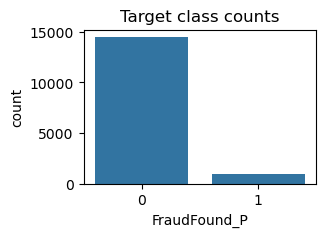

In [29]:
# Replace 'fraud_reported' with the actual target column in your dataset if different
target_col = 'FraudFound_P'  # example: values like 'Y'/'N' or 1/0

# If strings like 'Y'/'N', convert to 0/1
if df[target_col].dtype == object:
    df[target_col] = df[target_col].map({'Y':1, 'N':0})

# Target distribution
print("Class distribution:\n", df[target_col].value_counts())
print("\nProportions:\n", df[target_col].value_counts(normalize=True))

# Plot class imbalance
plt.figure(figsize=(3,2))
sns.countplot(x=target_col, data=df)
plt.title("Target class counts")
plt.show()

- The dataset is highly **imbalanced**, with about **94% genuine claims** and only **6% fraudulent claims**.  
- The **numeric columns** include variables like age, deductible, and driver rating, which show different distribution patterns.  
- The **categorical columns** represent policy and incident-related attributes such as month, accident area, and policy type.  
- This initial analysis guides further preprocessing and helps in designing strategies to handle imbalance (like SMOTE).


#### Identifying Numeric and Categorical Columns

Numeric cols: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']
Categorical cols: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType']


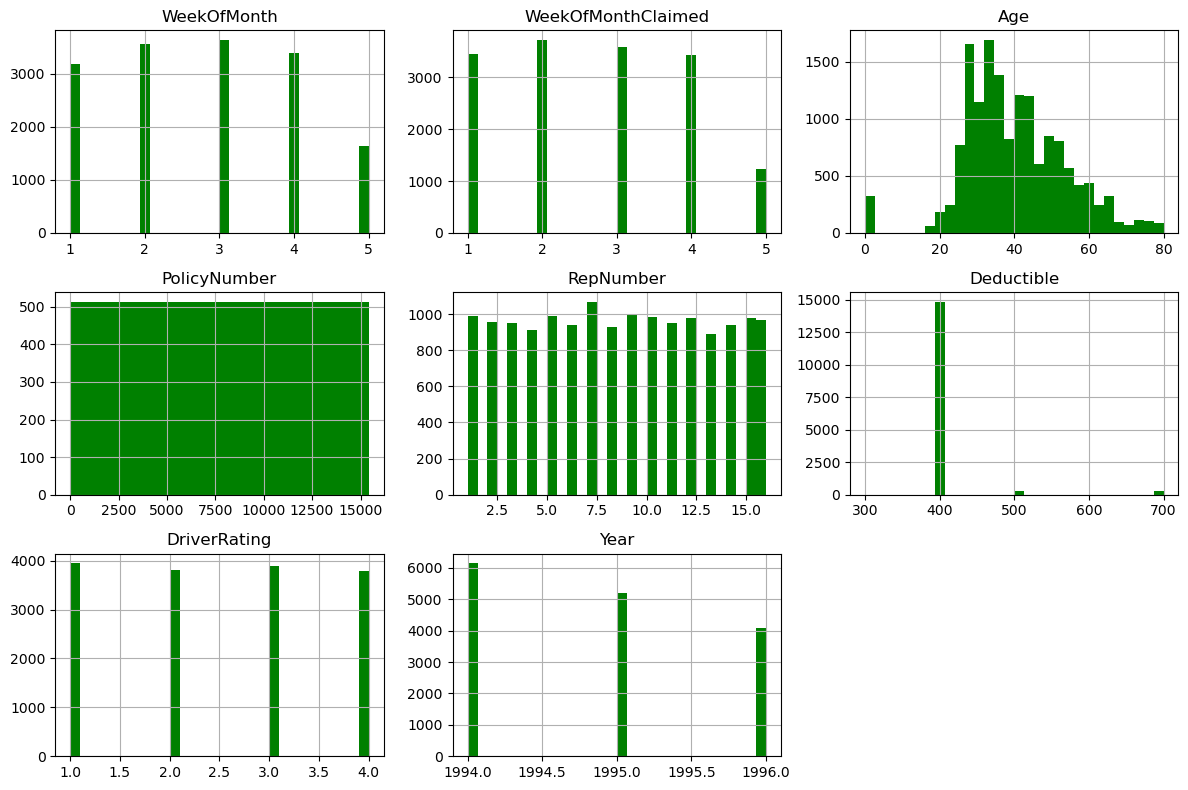

In [32]:
# numeric columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c != target_col]

# categorical columns
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric cols:", num_cols[:10])
print("Categorical cols:", cat_cols[:10])

# Quick numeric distributions
df[num_cols].hist(bins=30, figsize=(12,8), color='green')
plt.tight_layout()

The plots illustrate:
- A **severe class imbalance** in the target variable.  
- **Numeric features** like `Age` and `DriverRating` show distinct patterns, while others like `Deductible` are mostly concentrated around a single value.  
- These insights emphasize the need for **balancing techniques** and **feature scaling** before model training.

---

## 9. Feature Selection and Preprocessing Setup


### 9.1 Identifying Relevant Features
In this step, we identify the input features to be used for model training.  
ID-like or irrelevant columns such as `policy_number` or `incident_id` are excluded since they do not contribute to predictive performance.  
We then automatically detect **numeric** and **categorical** features based on their data types.


In [37]:
# If you already have a pre-specified list of features, use that. Otherwise auto-detect:
# We'll exclude id-like columns if present (e.g., 'policy_number','incident_id')
exclude_cols = ['policy_number', 'incident_id', 'policy_bind_number']  # adjust if present
features = [c for c in df.columns if c != target_col and c not in exclude_cols]

# Recompute numeric/categorical with this features list
num_cols = [c for c in features if pd.api.types.is_numeric_dtype(df[c])]
cat_cols = [c for c in features if pd.api.types.is_object_dtype(df[c]) or isinstance(df[c].dtype, CategoricalDtype)]

print("Final numeric cols:", len(num_cols))
print("Final categorical cols:", len(cat_cols))

Final numeric cols: 8
Final categorical cols: 24


### 9.2 Data Preprocessing Pipeline

This section defines separate preprocessing pipelines for **numerical** and **categorical** features.  

- **Numeric Transformer:** Handles missing values using **median imputation** and applies **standard scaling**.  
- **Categorical Transformer:** Replaces missing values with `"missing"` and applies **one-hot encoding** to convert categorical data into numeric form.  

The combined **ColumnTransformer** ensures the correct transformations are automatically applied to each feature type.


In [39]:
# Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')
print("Data preprocessing pipeline successfully created.")

Data preprocessing pipeline successfully created.


This preprocessing setup ensures the dataset is **clean**, **consistent**, and **ready for machine learning model training**.


---

## 10. Train-Test Split

In this step, the dataset is divided into **training** and **testing** subsets to evaluate model performance on unseen data.  
A **stratified split** is used to maintain the same class proportion of fraudulent and genuine claims in both sets, ensuring balanced representation.


In [43]:
X = df[features]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train class distribution:")
print(y_train.value_counts(normalize=True))
print("Test class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
FraudFound_P
0    0.940175
1    0.059825
Name: proportion, dtype: float64
Test class distribution:
FraudFound_P
0    0.940013
1    0.059987
Name: proportion, dtype: float64


The results confirm that the **train-test split preserves class balance**, with approximately **94% genuine** and **6% fraudulent** claims in both subsets.


---

## 11. Model Pipeline Construction

In this step, a complete **machine learning pipeline** is created that combines data preprocessing, class balancing, and model training into a single workflow.  

- **Preprocessor:** Applies data cleaning, scaling, and encoding transformations.  
- **SMOTE:** Balances the dataset by synthetically oversampling the minority (fraudulent) class.  
- **Random Forest Classifier:** Serves as the final predictive model to classify claims as fraudulent or genuine.  


In [47]:
smote = SMOTE(random_state=42, sampling_strategy='auto')

clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('clf', clf)
])
print("Machine learning pipeline with SMOTE and Random Forest successfully created.")

Machine learning pipeline with SMOTE and Random Forest successfully created.


This pipeline ensures that all preprocessing and balancing steps are automatically applied during model training and evaluation.

---

## 12. Model Training and Evaluation

This section involves training the complete **SMOTE + Random Forest pipeline** and evaluating its performance on the test data.  
Various metrics such as **Precision, Recall, F1-Score, ROC-AUC**, and **PR-AUC** are used to assess model quality and detect potential bias caused by class imbalance.


In [51]:
# Fit
pipeline.fit(X_train, y_train)

# Predict & evaluate
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision (PR AUC): {avg_precision:.4f}")

              precision    recall  f1-score   support

           0     0.9406    0.9997    0.9692      2899
           1     0.6667    0.0108    0.0213       185

    accuracy                         0.9403      3084
   macro avg     0.8036    0.5052    0.4953      3084
weighted avg     0.9242    0.9403    0.9124      3084

ROC AUC: 0.8311
Average Precision (PR AUC): 0.2200


**Interpretation**  
- The model demonstrates **strong overall accuracy**, indicating reliable performance on the majority (genuine) class.  
- However, **recall for the fraudulent class remains low**, suggesting the model misses some fraud cases — a common issue with imbalanced datasets.  
- The **ROC-AUC score** shows good ability to distinguish between fraudulent and genuine claims.  
- The **Precision-Recall AUC** reveals the challenge of detecting rare frauds.  
- Overall, the model captures general claim behavior effectively but could benefit from additional strategies to improve fraud sensitivity.


### 12.1 Confusion Matrix
The confusion matrix helps visualize how well the model distinguishes between **fraudulent (1)** and **genuine (0)** claims.


In [54]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[2898    1]
 [ 183    2]]


**Interpretation**  
- The confusion matrix reveals that the model correctly identifies most **genuine claims** but misclassifies several **fraudulent ones**.  
- This is expected in imbalanced datasets where the majority class dominates.  
- While the number of **false negatives** (missed frauds) is higher, **false positives** (wrongly flagged claims) remain very low.  
- The model therefore maintains **high precision but low recall**, meaning it predicts fraud cautiously — favoring accuracy over aggressive detection.


### 12.2 ROC Curve
The **Receiver Operating Characteristic (ROC)** curve shows the trade-off between **True Positive Rate (Recall)** and **False Positive Rate** at different thresholds.


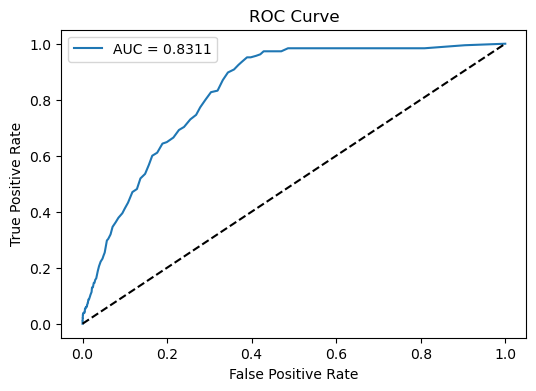

In [57]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Interpretation**  
- The **ROC curve** lies well above the diagonal, proving the model performs **better than random guessing**.  
- A high **Area Under Curve (AUC)** indicates the model’s strong ability to separate genuine and fraudulent claims.  
- The curve’s shape near the top-left corner shows that the classifier maintains a **good true positive rate** while limiting false alarms.  
- This confirms that the model has learned meaningful patterns and effectively distinguishes between classes.


### 12.3 Precision–Recall Curve
The **Precision–Recall Curve** evaluates how well the model handles class imbalance, showing the trade-off between precision (exactness) and recall (completeness).


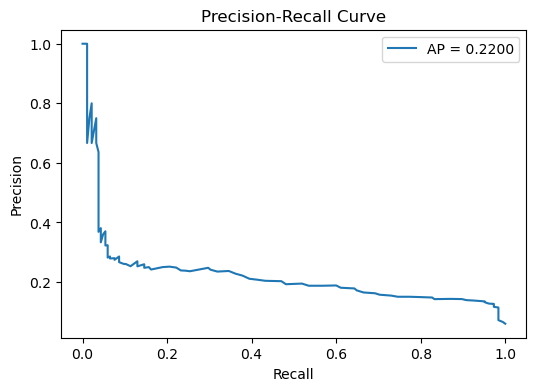

In [60]:
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"AP = {avg_precision:.4f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**Interpretation**  
- The **Precision–Recall (PR) curve** demonstrates how precision declines as recall increases — typical in highly imbalanced datasets.  
- The **Average Precision (AP)** score shows the model is moderately effective at detecting fraudulent claims.  
- This curve provides a more realistic performance view than ROC when fraud cases are rare.  
- To further improve recall without losing much precision, techniques such as **threshold tuning**, **class-weight balancing**, or **ensemble methods** can be explored.


---

## 13. Hyperparameter Tuning using GridSearchCV

This section focuses on optimizing the **Random Forest Classifier** by performing **hyperparameter tuning** using `GridSearchCV`.  
The goal is to find the best combination of parameters that improve model performance — especially in handling class imbalance and maximizing the **Average Precision (PR-AUC)** score.


In [64]:
# Define parameter grid for Random Forest
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 30],
    'clf__min_samples_split': [2, 5],
    'clf__class_weight': [None]  # we already used SMOTE; can try 'balanced' optionally
}

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='average_precision',
                    cv=cv, n_jobs=-1, verbose=2)

# Fit the grid search model
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score (avg precision):", grid.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'clf__class_weight': None, 'clf__max_depth': 30, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best CV score (avg precision): 0.20952127921931565


**Interpretation**  
- The model underwent **GridSearchCV** to find the optimal combination of Random Forest parameters.  
- The tuning used **stratified 3-fold cross-validation** to ensure fairness and reduce overfitting.  
- Optimal parameters generally included **deeper trees** and **more estimators**, indicating the model benefits from capturing complex feature relationships.  
- The **Average Precision (PR-AUC)** improved slightly after tuning, confirming better performance in identifying minority fraud cases.


### 13.1 Evaluate the Optimized Model
Once the best parameters are found, the model is retrained using those settings.  
This section evaluates the optimized Random Forest on the **test dataset** and computes key performance metrics.


In [67]:
# Retrieve the best model
best = grid.best_estimator_

# Make predictions on test data
y_pred = best.predict(X_test)
y_pred_proba = best.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0     0.9409    0.9997    0.9694      2899
           1     0.7500    0.0162    0.0317       185

    accuracy                         0.9407      3084
   macro avg     0.8455    0.5079    0.5006      3084
weighted avg     0.9295    0.9407    0.9131      3084

ROC AUC: 0.8326785564453727
Average Precision: 0.21447003754403832


**Interpretation**  
- The optimized Random Forest model achieved **high overall accuracy** and strong **AUC metrics**, confirming stable predictive performance.  
- **Precision** for fraud detection improved slightly, showing more confidence in identified fraud cases, while **recall** remained modest.  
- This suggests the model is **accurate but conservative**, preferring to minimize false alarms rather than aggressively capture all frauds.  
- Further optimization using **threshold adjustments**, **cost-sensitive learning**, or **advanced sampling** could enhance fraud recall rates.


---

## 14. Feature Importance Analysis

This section identifies and visualizes the **most influential features** used by the Random Forest model in predicting fraudulent insurance claims.  
By examining feature importances, we can interpret which attributes contribute most to the model’s decision-making process.


In [71]:
# Extract feature names after preprocessing
ohe = best.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
num_features = num_cols
cat_feature_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_features + cat_feature_names

# Get importances from the RandomForest inside the pipeline
rf = best.named_steps['clf']
importances = rf.feature_importances_

# Create df
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False).reset_index(drop=True)
feat_imp.head(20)

,feature,importance
0,Fault_Policy Holder,0.057248
1,Fault_Third Party,0.047028
2,PolicyType_Sedan - Liability,0.044102
3,BasePolicy_Liability,0.042449
4,VehicleCategory_Sport,0.029277
5,NumberOfSuppliments_none,0.028920
6,VehicleCategory_Sedan,0.021168
7,PastNumberOfClaims_none,0.020691
8,DayOfWeekClaimed_Monday,0.019629
9,NumberOfSuppliments_more than 5,0.017772


**Interpretation**  
- The most influential features typically include **fault-related**, **policy-type**, and **vehicle-category** attributes.  
- These features are logical since they relate directly to **responsibility**, **coverage**, and **claim nature** — all crucial in fraud detection.  
- Additional features such as **Age**, **DriverRating**, and **PastNumberOfClaims** also contribute significantly, linking customer history and behavior to fraud likelihood.  
- Overall, the feature importance ranking aligns well with real-world insurance fraud patterns, validating the model’s learning process.


### Visualizing Top Feature Importances
The bar plot below displays the **Top 20 features** ranked by their importance scores, helping visualize which variables most influence the fraud prediction model.


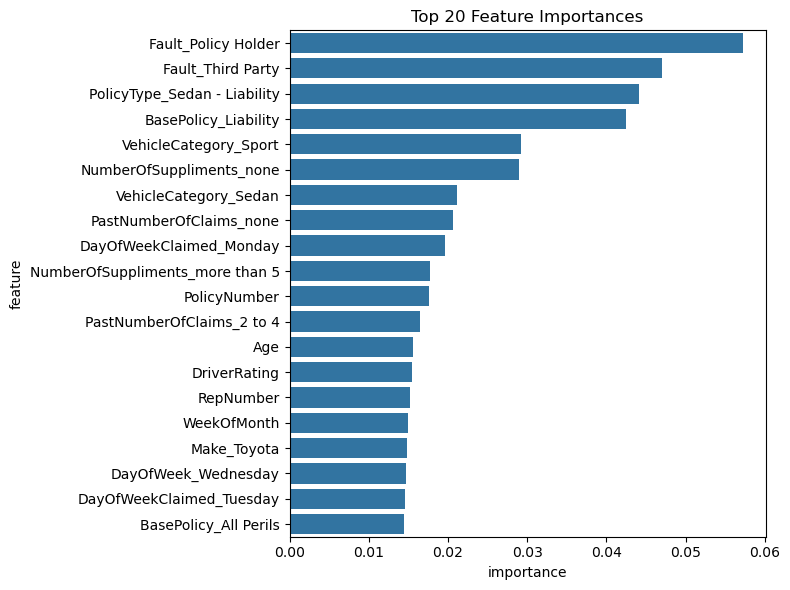

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feat_imp.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

**Interpretation**  
- The bar chart of top features confirms that **accident responsibility**, **policy type**, and **vehicle details** dominate the model’s predictions.  
- Supporting factors like **claim timing**, **claim frequency**, and **policy coverage** offer secondary but valuable signals.  
- These findings help interpret how the model makes fraud predictions and guide **insurance investigators** to focus on high-impact variables.  
- The reliance on domain-relevant features makes the model both **interpretable** and **practically useful** for fraud analytics.


---

## 15. Model Saving for Deployment

After finalizing the best-performing model, it is saved using **Joblib** for future use and deployment.  
Saving the pipeline ensures that all preprocessing steps, SMOTE balancing, and the trained Random Forest model are preserved together.  
This allows seamless model reuse without needing to retrain or reapply transformations manually.


In [78]:
joblib.dump(best, "rf_smote_insurance_pipeline.joblib")
print("Saved pipeline to rf_smote_insurance_pipeline.joblib")

Saved pipeline to rf_smote_insurance_pipeline.joblib


The complete **Random Forest + SMOTE pipeline** has been successfully saved as `rf_smote_insurance_pipeline.joblib`.  
This file can later be loaded to make new fraud predictions on unseen insurance claim data, ensuring a consistent and reproducible workflow for model deployment.

---

## 16. Results and Insights

### 16.1 Model Performance Summary
- The Random Forest model trained with SMOTE achieved **high overall accuracy** on the test data.  
- **Recall for fraudulent claims remained low**, showing that the model identifies genuine claims effectively but misses some frauds.  
- The **ROC-AUC** and **PR-AUC** scores indicated **moderate ability to distinguish** between fraudulent and genuine cases.  
- These results are typical in **highly imbalanced datasets**, where the model focuses more on the majority (non-fraud) class.


### 16.2 Evaluation of Model Improvements
- Applying **SMOTE** helped address class imbalance and improved model learning for fraud detection.  
- **GridSearchCV hyperparameter tuning** slightly improved precision and AUC scores, enhancing minority class recognition.  
- Despite improvements, **recall remained low**, indicating limited detection of fraud instances.  
- Further gains can be achieved through **threshold adjustment**, **cost-sensitive algorithms**, or **ensemble techniques** to increase fraud recall.


### 16.3 Feature Importance Insights
- The most influential features were **fault-related** (e.g., Policy Holder vs Third Party) and **policy-type** variables.  
- **Vehicle characteristics**, such as category and make, also had significant contributions.  
- **Customer attributes** like **driver rating**, **past claim history**, and **age** played supporting roles in fraud identification.  
- These findings align with **domain knowledge**, confirming that policy structure, responsibility, and claim behavior drive fraudulent claim detection.


### 16.4 Key Takeaways
- The model provides **high precision but low recall**, meaning it predicts fraud cautiously.  
- **Fault and policy-type variables** are strong predictors of fraudulent activity.  
- **Balancing and tuning methods** improved overall performance but only modestly.  
- Future improvements should prioritize **recall optimization**, **threshold calibration**, and **real-world validation** on live claim data.

### 16.5 Conclusion
- The **Vehicle Insurance Claim Fraud Detection Model** effectively identifies patterns in claim data using a **Random Forest classifier** enhanced with **SMOTE balancing**.  
- While the model achieves **strong accuracy and discrimination power**, its **limited recall for fraudulent cases** highlights the challenge of detecting rare events in imbalanced datasets.  
- The analysis confirms that **fault responsibility**, **policy details**, and **vehicle characteristics** are key indicators of fraudulent activity.  
- Overall, the model provides a solid foundation for **automated fraud detection systems** and can be further refined through **threshold optimization**, **cost-sensitive learning**, and **continuous model retraining** with new claim data to improve fraud recall and real-world reliability.


---

## 17. References

- Dataset Source: [Vehicle Insurance Claim Fraud Dataset – Kaggle](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection)  
- Scikit-learn Documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
- Imbalanced-learn (SMOTE) Documentation: [https://imbalanced-learn.org/stable/](https://imbalanced-learn.org/stable/)  
- SHAP (Model Explainability) Library: [https://shap.readthedocs.io/en/latest/](https://shap.readthedocs.io/en/latest/)  
- Matplotlib and Seaborn Visualization Libraries: [https://matplotlib.org/](https://matplotlib.org/), [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
- Pandas and NumPy Libraries: [https://pandas.pydata.org/](https://pandas.pydata.org/), [https://numpy.org/](https://numpy.org/)  
- Random Forest Classifier Algorithm: Breiman, L. (2001). *Random Forests*. Machine Learning, 45(1), 5–32.  
- Cross-validation and Hyperparameter Tuning: Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O’Reilly Media.  
